## Employee Turn Over Prediction

In [9]:
ep = pd.read_csv(r"C:\Users\DELL\Downloads/WA_Fn-UseC_-HR-Employee-Attrition (1).csv")

## Basic Libraries used

In [122]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [11]:
ep.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
pd.set_option('display.max_columns',None) #it display all coloumns and remove dot dot where the coloumns dont get visible

In [13]:

ep.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:
ep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [17]:
ep.isnull().sum()[ep.isnull().sum() > 0] 

Series([], dtype: int64)

In [21]:
ep_duplicates = ep.duplicated().sum()    #chking duplicates

In [23]:
ep_cleaned = ep.drop_duplicates()    #drop the duplicated rows

In [25]:
ep.shape

(1470, 35)

In [27]:
ep.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [29]:
ep.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [31]:
ep['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

The counts of 0 and 1 for the Attrition variable indicate the distribution of the two classes within your dataset. Here's what it means in the context of attrition:

Attrition (0): 1233 employees did not leave the company (no attrition).
Attrition (1): 237 employees left the company (attrition).

## TARGET VARIABLE

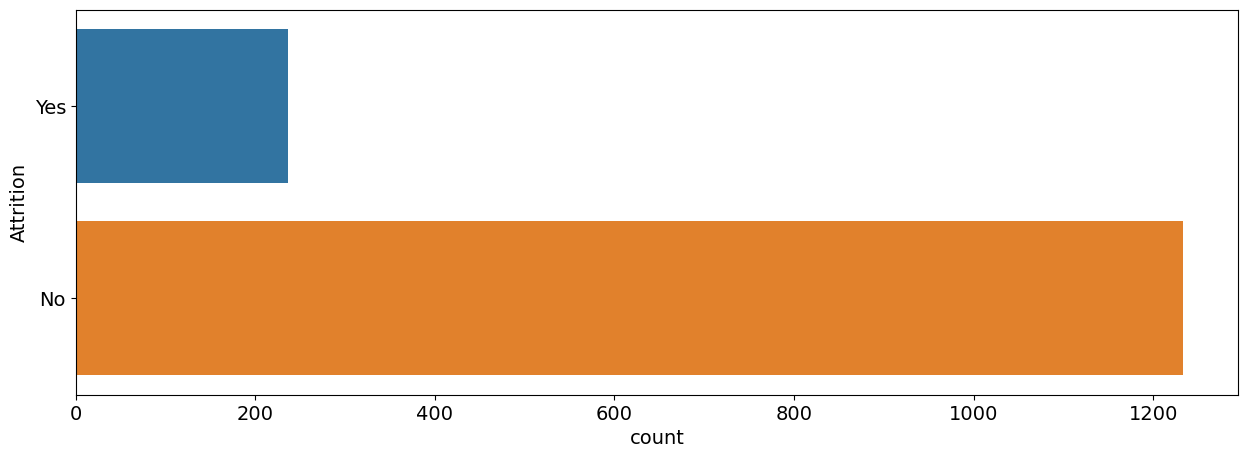

In [34]:
plt.figure(figsize=(15,5))
plt.rc("font",size=14)
sns.countplot(y='Attrition',data=ep) 
plt.show()

# EDA

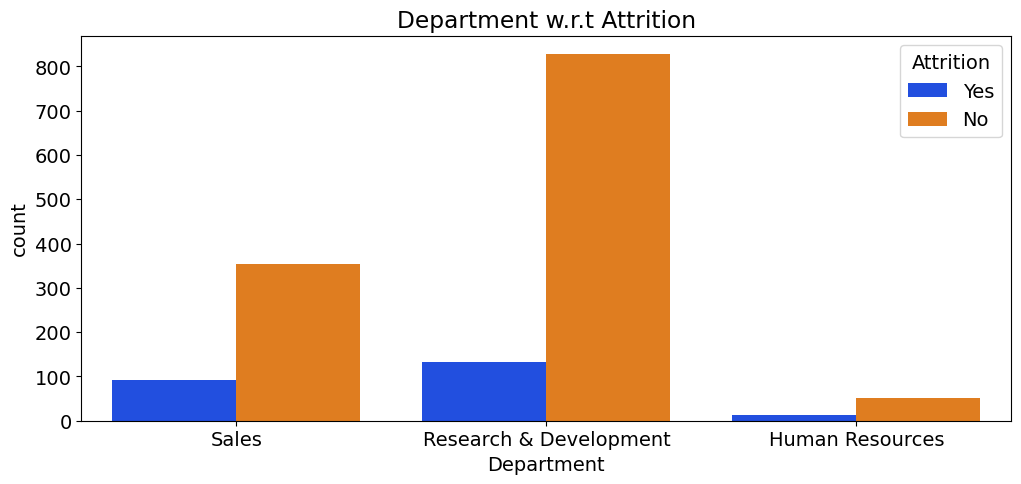

In [36]:
#Departments w.r.t Attrition
plt.figure(figsize=(12,5))
sns.countplot(x='Department',hue='Attrition',data=ep,palette='bright') 
plt.title("Department w.r.t Attrition")
plt.show()

# Insights

Sales: The majority of employees have not left the company (blue bars), indicating lower attrition in this department.
Research & Development: This department has a higher number of employees who have left (orange bars) compared to those who have stayed, suggesting higher attrition.
Human Resources: Similar to Sales, more employees have stayed than left, indicating lower attrition.
Overall, the Research & Development department seems to have the highest attrition rate, which could be a point of concern for the organization.

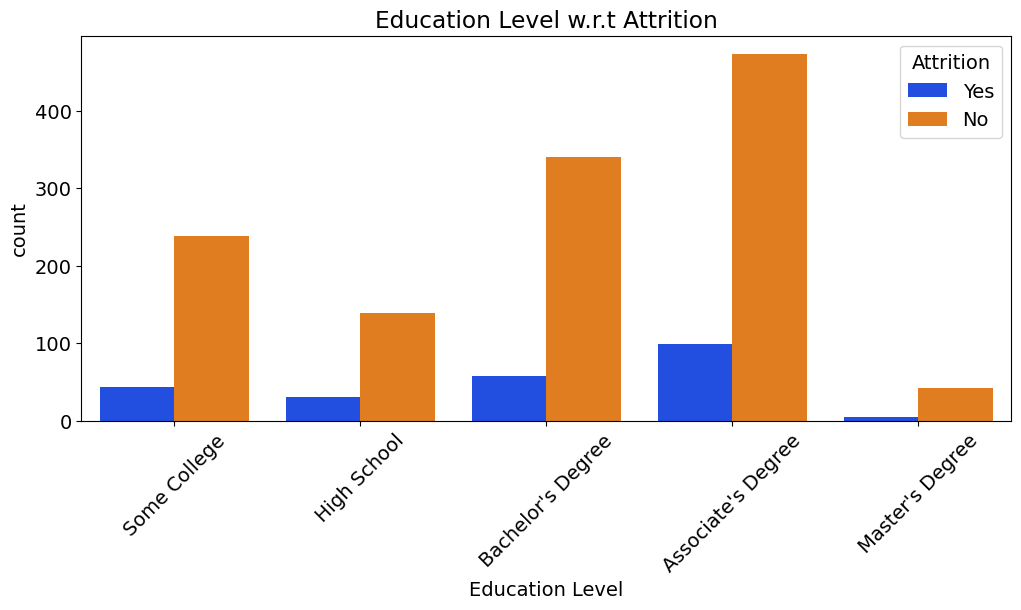

In [38]:
education_mapping = {
    1: 'High School',
    2: 'Some College',
    3: 'Associate\'s Degree',
    4: 'Bachelor\'s Degree',
    5: 'Master\'s Degree',
    6: 'Doctorate/Professional Degree'
}

# Map the numeric codes to the corresponding education level names
ep['Education Level'] = ep['Education'].map(education_mapping)

# Set the figure size
plt.figure(figsize=(12, 5))

# Create a count plot for Education Level with respect to Attrition
sns.countplot(x='Education Level', hue='Attrition', data=ep, palette='bright')

# Set the title of the plot
plt.title("Education Level w.r.t Attrition")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

## INSIGHTS

Bachelor’s Degree: Highest number of employees, both in terms of those who have left and those who have stayed.
Master’s Degree: Lowest count for both categories, indicating fewer employees with this level of education.
High School and Some College: Moderate counts, with more employees staying than leaving.
Overall, employees with a Bachelor’s degree are the most common, and attrition is relatively higher in this group compared to others.

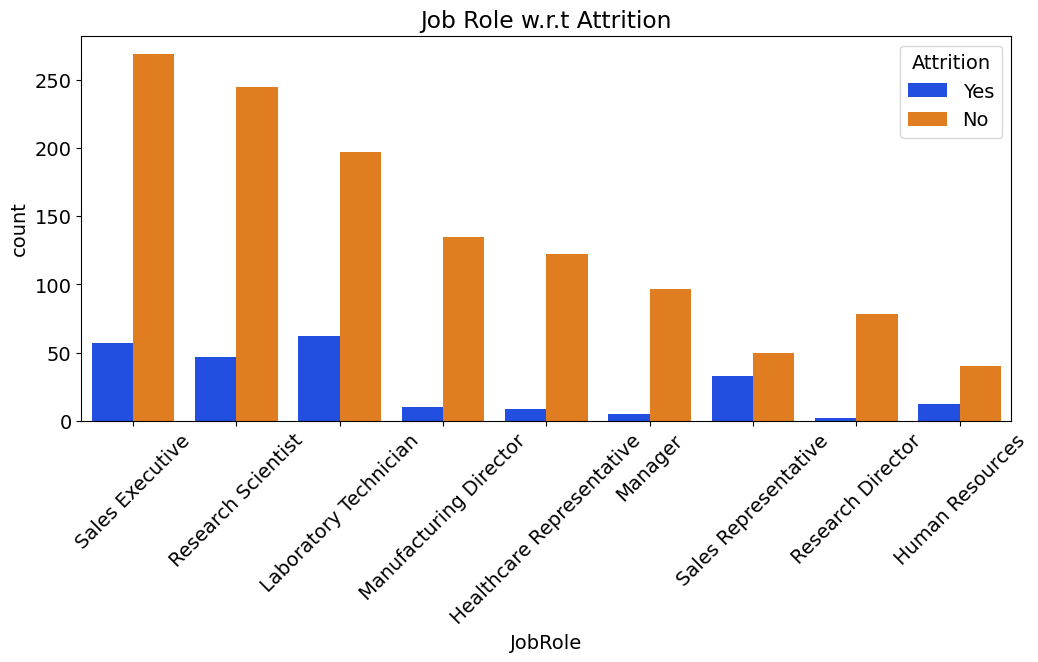

In [40]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Create a count plot for Job Role with respect to Attrition
sns.countplot(x='JobRole', hue='Attrition', data=ep, palette='bright')

# Set the title of the plot
plt.title("Job Role w.r.t Attrition")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Insights:
The plot allows you to compare how many employees in each job role have stayed with the company versus those who have left.
You can identify if certain job roles have higher attrition rates than others, which could indicate areas of concern for employee retention.
For example, if you see that the Sales Executive job role has a significantly higher number of employees who have left (more bars colored for Attrition = Yes), it might suggest that this role is more prone to attrition.

In [42]:
ep['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [44]:
ep["count"] = 1

In [48]:

ep.groupby(['Gender','Attrition']).agg({"count":"sum"})

count
Gender Attrition       
Female No           501
       Yes           87
Male   No           732
       Yes          150

In [50]:
ep.drop(columns=["count"],inplace = True)

In [ ]:
#OBSERVATIONS

Employees working in R&D Department are more but Employees from sales department or at position like sales executive and Representative leaves the job early
Males are more Attrrition than females

In [52]:
ep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [54]:
ep[ep.select_dtypes(include='object').columns] = ep[ep.select_dtypes(include='object').columns].apply(le.fit_transform)

In [56]:
ep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [58]:

ep.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education Level
0,41,1,2,1102,2,1,2,1,1,1,...,80,0,8,0,1,6,4,0,5,4
1,49,0,1,279,1,8,1,1,1,2,...,80,1,10,3,3,10,7,1,7,2
2,37,1,2,1373,1,2,2,4,1,4,...,80,0,7,3,3,0,0,0,0,4
3,33,0,1,1392,1,3,4,1,1,5,...,80,0,8,3,3,8,7,3,0,1
4,27,0,2,591,1,2,1,3,1,7,...,80,1,6,3,3,2,2,2,2,2


In [60]:
from imblearn.over_sampling import SMOTE

## LOGISTIC REGRESSION

In [63]:
X = ep.drop(columns=['Attrition'],axis=1)  #input features
y = ep['Attrition'].values #output

In [65]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [69]:
# Initialize and fit the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=10000)
logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=10000, random_state=42)

In [71]:
# Predict class labels for the test set
pred_test = logreg.predict(X_test)

In [73]:
y_probs_logreg = logreg.predict_proba(X_test)[:, 1]
y_pred_logreg = logreg.predict(X_test)

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc

In [77]:
# Calculate FPR, TPR, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_logreg)


In [79]:
# Compute AUC
roc_auc = auc(fpr, tpr)


In [81]:
from sklearn.metrics import confusion_matrix ,recall_score,precision_score,accuracy_score,f1_score,classification_report

In [83]:
confusion_matrix(y_test,pred_test)

array([[215,  40],
       [ 18,  21]], dtype=int64)

In [85]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       255
           1       0.34      0.54      0.42        39

    accuracy                           0.80       294
   macro avg       0.63      0.69      0.65       294
weighted avg       0.85      0.80      0.82       294



Interpretation
The metrics suggest the following:

The model is very good at identifying class 0 instances (high precision and moderate recall).
The model struggles with identifying class 1 instances (low precision but moderate recall).

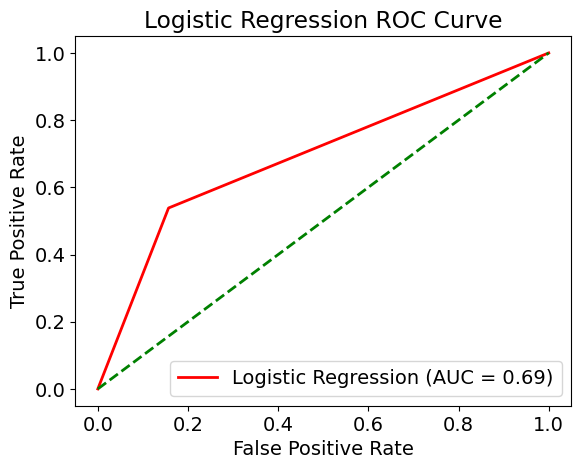

In [87]:
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

## DECISION TREE

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()


In [92]:
dt.fit(X_train_smote, y_train_smote)
pred_dt = dt.predict(X_test)


In [94]:
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test, pred_dt))

[[207  48]
 [ 27  12]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       255
           1       0.20      0.31      0.24        39

    accuracy                           0.74       294
   macro avg       0.54      0.56      0.54       294
weighted avg       0.79      0.74      0.77       294



## RANDOM FOREST

In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [100]:
rfc.fit(X_train_smote, y_train_smote)

rfc_pred = rfc.predict(X_test)

In [102]:
confusion_matrix(y_test,rfc_pred)

array([[241,  14],
       [ 25,  14]], dtype=int64)

In [104]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.50      0.36      0.42        39

    accuracy                           0.87       294
   macro avg       0.70      0.65      0.67       294
weighted avg       0.85      0.87      0.86       294



In [130]:
# Assuming X, y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best parameters from GridSearch (as an example)
best_params = {
    'n_estimators': 200,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'class_weight': 'balanced'
}

# Train the model using the best parameters
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_best.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))

# (Optional) Print the confusion matrix for more insight
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.62      0.13      0.21        39

    accuracy                           0.87       294
   macro avg       0.75      0.56      0.57       294
weighted avg       0.85      0.87      0.84       294

[[252   3]
 [ 34   5]]


## FEATURE IMPORTANCE

In [107]:
rfc.feature_importances_

array([0.03550866, 0.03020413, 0.0386381 , 0.00707622, 0.03198456,
       0.02111841, 0.01756973, 0.        , 0.03793866, 0.03976229,
       0.00769802, 0.03670938, 0.04047279, 0.03331281, 0.02186314,
       0.05237585, 0.01718455, 0.05929645, 0.03587015, 0.02178685,
       0.        , 0.01618812, 0.02386243, 0.0062771 , 0.0219206 ,
       0.        , 0.08594974, 0.04026821, 0.02597161, 0.0389409 ,
       0.03637468, 0.03792352, 0.01799393, 0.04179423, 0.02016418])

In [109]:
X_train_smote.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Education Level'],
      dtype='object')

In [111]:
rfc_feat_imp = pd.DataFrame()

rfc_feat_imp['Features'] = X_train_smote.columns
rfc_feat_imp['Imp'] = rfc.feature_importances_
rfc_feat_imp

,Features,Imp
0,Age,0.035509
1,BusinessTravel,0.030204
2,DailyRate,0.038638
3,Department,0.007076
4,DistanceFromHome,0.031985
5,Education,0.021118
6,EducationField,0.017570
7,EmployeeCount,0.000000
8,EmployeeNumber,0.037939
9,EnvironmentSatisfaction,0.039762


In [113]:
significant_feat = rfc_feat_imp.sort_values('Imp',ascending = False)
significant_feat

,Features,Imp
26,StockOptionLevel,0.085950
17,MonthlyIncome,0.059296
15,JobSatisfaction,0.052376
33,YearsWithCurrManager,0.041794
12,JobInvolvement,0.040473
27,TotalWorkingYears,0.040268
9,EnvironmentSatisfaction,0.039762
29,WorkLifeBalance,0.038941
2,DailyRate,0.038638
8,EmployeeNumber,0.037939


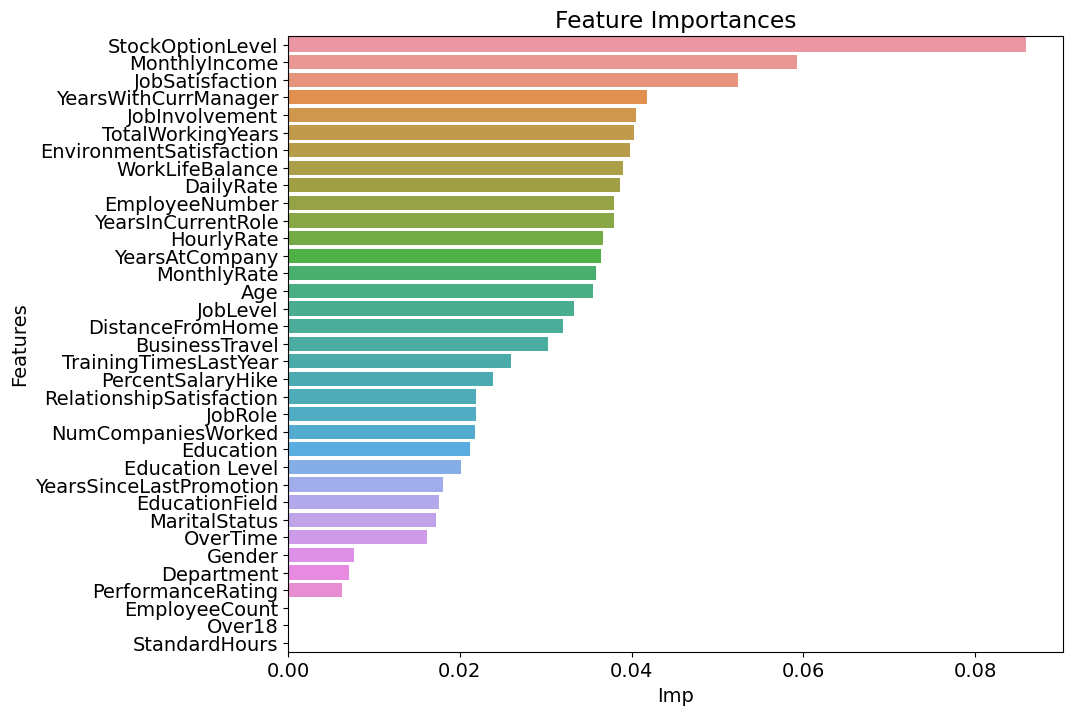

In [115]:
plt.figure(figsize=(10,8))
sns.barplot(x='Imp',y='Features',data=significant_feat)
plt.title('Feature Importances')
plt.show()

## Conclusion

Random Forest appears to perform the best overall, balancing precision, recall, and F1-score, especially when predicting attrition.

Decision Tree performs well in terms of overall accuracy and F1-score, but may not generalize as well as Random Forest.

Logistic Regression seems to underperform, particularly in predicting attrition, with lower precision and recall, which drags down its F1-score and overall utility for this specific task.

If these assumptions about which set of metrics corresponds to which model are correct, then Random Forest is the best performer for predicting employee attrition in this dataset.